In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
p_df = pd.read_pickle(r"C:\Users\srish\Documents\NEU\Parallell ML and AI\Untitled Folder\data\example_pickle.tar\example_pickle\example_pickle")

In [4]:
p_df

,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,...,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,stddev_output_idle_time,mean_input_idle_time,stddev_input_idle_time
0,False,17KCKe2Y1G4Yq8n8rxpGfCfAFaeHfe6HbQ,1535760000,1564617600,1541030400,1585699200,28857600,44668800,-21081600,-5270400,...,104885531.000000000,2913486.972222222,1.818265e+06,4,2913486.972222222,1.0,7.899492e+05,6.208239e+05,1.483250e+07,8.952467e+06
1,False,1BBWdYQC8dqbcmX18xFcFtnAibnoQSQHfH,1388534400,1398902400,1391212800,1401580800,10368000,10368000,-2678400,-2678400,...,417604833.000000000,2676954.057692308,2.575962e+06,31,2676954.057692308,1.0,6.073680e+04,2.096533e+05,4.059397e+05,4.389097e+05
2,False,1AzTnHzcG9PTjsnDczrqJWYTkpg6vxSgRs,1504224000,1514764800,1504224000,1514764800,10540800,10540800,0,0,...,507601165.000000000,25380058.250000000,3.775487e+07,19,25380058.250000000,1.0,7.097466e+05,1.567057e+06,7.499310e+05,1.726071e+06
3,False,12bLfmAprxGBVxWJ3ygQByFs31A9joa1hp,1456790400,1496275200,1456790400,1496275200,39484800,39484800,0,0,...,330123219.000000000,5502053.650000000,3.977741e+06,60,5502053.650000000,1.0,6.957878e+05,9.700859e+05,6.804973e+05,9.228746e+05
4,False,1KxBDWvTLncwNLMFUyVCU2QwaUrY2FToE,1472688000,1506816000,1472688000,1506816000,34128000,34128000,0,0,...,1378204470.000000000,5815208.734177215,1.119639e+07,104,5815208.734177215,1.0,1.399946e+05,4.138563e+05,3.209693e+05,5.447932e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5010027,False,15CFGNLRjzh17PD5c8NvwbKunqFtV4eTHp,1496275200,1519862400,1496275200,1519862400,23587200,23587200,0,0,...,5650618.000000000,297400.947368421,1.326813e+05,15,297400.947368421,1.0,1.448501e+06,2.938029e+06,2.073995e+06,3.116732e+06
5010028,False,1LrbJDHLBfqkV2rvZYtuYQVY6S7CyxSnPy,1567296000,1577836800,1572566400,1590969600,10540800,18403200,-13132800,-5270400,...,473344.000000000,24912.842105263,5.961492e+03,2,24912.842105263,1.0,6.052822e+05,6.163459e+04,1.879229e+07,NaN
5010029,False,3PXf42gfCZAL1nYZDQcPLJ5A3Af83YXYkQ,1590969600,1590969600,1590969600,1590969600,0,0,0,0,...,14200000.000000000,747368.421052632,3.045186e+05,19,747368.421052632,1.0,6.617000e+04,6.116551e+04,7.173517e+04,7.920090e+04
5010030,False,39fnDUHBJ9CsG9yZH64UCGsmk5FnWw4cHr,1559347200,1564617600,1559347200,1564617600,5270400,5270400,0,0,...,18192777.000000000,957514.578947368,7.207387e+05,19,957514.578947368,1.0,3.522885e+05,2.544391e+05,3.520739e+05,2.566096e+05


In [5]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patheffects as PathEffects
import matplotlib.pylab as pylab
import numpy as np
import pandas as pd
import itertools
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time
import seaborn as sns
from keras import utils, optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import binary_crossentropy

Using TensorFlow backend.


In [6]:
p_df.drop(labels = ['stddev_output_idle_time','stddev_input_idle_time'], axis = 1, inplace = True)

In [7]:
p_df.tail(5)

,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,...,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,mean_input_idle_time
5010027,False,15CFGNLRjzh17PD5c8NvwbKunqFtV4eTHp,1496275200,1519862400,1496275200,1519862400,23587200,23587200,0,0,...,6,19,5650618.000000000,297400.947368421,132681.260484,15,297400.947368421,1.0,1.448501e+06,2.073995e+06
5010028,False,1LrbJDHLBfqkV2rvZYtuYQVY6S7CyxSnPy,1567296000,1577836800,1572566400,1590969600,10540800,18403200,-13132800,-5270400,...,2,19,473344.000000000,24912.842105263,5961.492051,2,24912.842105263,1.0,6.052822e+05,1.879229e+07
5010029,False,3PXf42gfCZAL1nYZDQcPLJ5A3Af83YXYkQ,1590969600,1590969600,1590969600,1590969600,0,0,0,0,...,1,19,14200000.000000000,747368.421052632,304518.601973,19,747368.421052632,1.0,6.617000e+04,7.173517e+04
5010030,False,39fnDUHBJ9CsG9yZH64UCGsmk5FnWw4cHr,1559347200,1564617600,1559347200,1564617600,5270400,5270400,0,0,...,3,19,18192777.000000000,957514.578947368,720738.669685,19,957514.578947368,1.0,3.522885e+05,3.520739e+05
5010031,False,1CfcXjeEynTeRXdpLRzLvkU2nb7c3tmZQ1,1572566400,1583020800,1575158400,1583020800,10454400,7862400,0,-2592000,...,4,19,10374.000000000,546.000000000,0.000000,10,546.000000000,1.0,5.927042e+05,8.557566e+05


In [8]:
p_df.head(5)

,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,...,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,mean_input_idle_time
0,False,17KCKe2Y1G4Yq8n8rxpGfCfAFaeHfe6HbQ,1535760000,1564617600,1541030400,1585699200,28857600,44668800,-21081600,-5270400,...,4,36,104885531.000000000,2913486.972222222,1.818265e+06,4,2913486.972222222,1.0,789949.200000,1.483250e+07
1,False,1BBWdYQC8dqbcmX18xFcFtnAibnoQSQHfH,1388534400,1398902400,1391212800,1401580800,10368000,10368000,-2678400,-2678400,...,5,156,417604833.000000000,2676954.057692308,2.575962e+06,31,2676954.057692308,1.0,60736.800000,4.059397e+05
2,False,1AzTnHzcG9PTjsnDczrqJWYTkpg6vxSgRs,1504224000,1514764800,1504224000,1514764800,10540800,10540800,0,0,...,4,20,507601165.000000000,25380058.250000000,3.775487e+07,19,25380058.250000000,1.0,709746.555556,7.499310e+05
3,False,12bLfmAprxGBVxWJ3ygQByFs31A9joa1hp,1456790400,1496275200,1456790400,1496275200,39484800,39484800,0,0,...,16,60,330123219.000000000,5502053.650000000,3.977741e+06,60,5502053.650000000,1.0,695787.771930,6.804973e+05
4,False,1KxBDWvTLncwNLMFUyVCU2QwaUrY2FToE,1472688000,1506816000,1472688000,1506816000,34128000,34128000,0,0,...,14,237,1378204470.000000000,5815208.734177215,1.119639e+07,104,5815208.734177215,1.0,139994.555085,3.209693e+05


In [9]:
p_df.shape

(5010032, 28)

In [10]:
# Dropping the non-numeric features
features = p_df.drop(labels = ['is_miner', 'address'], axis = 1)
target = p_df['is_miner'].values
indices = range(len(features))

In [11]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth": 2.5})

In [12]:
def bitcoin_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize = (8, 8))
    ax = plt.subplot(aspect = 'equal')
    sc = ax.scatter(x[:,0], x[:,1], lw = 0, s = 40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    plt.title('t-SNE to visualize features')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize = 24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth = 5, foreground = "w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


In [ ]:
# time_start = time.time()
# RS = 123
# bitcoin_tsne = TSNE(random_state = RS).fit_transform(features)
# print('Time elapsed: {} seconds' .format(time.time() - time_start))

In [13]:
# Splitting the training and testing dataset
x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(features, target, indices,  test_size = 0.2)

In [14]:
x_train.head()

,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,output_active_months,total_tx_output_count,...,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,mean_input_idle_time
2772772,1485907200,1488326400,1485907200,1488326400,2419200,2419200,0,0,2,3,...,2,3,134940000.000000000,44980000.000000000,4.823536e+07,3,44980000.000000000,1.0,6.483235e+05,657777.5
4098336,1577836800,1577836800,1577836800,1577836800,0,0,0,0,1,2,...,1,2,10389017.000000000,5194508.500000000,5.714363e+06,2,5194508.500000000,1.0,1.550000e+03,2768.0
3599905,1396310400,1396310400,1396310400,1396310400,0,0,0,0,1,2,...,1,2,444219271.000000000,222109635.500000000,2.751729e+08,2,222109635.500000000,1.0,7.704000e+03,494.0
1360453,1396310400,1406851200,1406851200,1406851200,10540800,0,0,-10540800,2,4,...,1,3,30133449.000000000,10044483.000000000,1.314129e+07,2,10044483.000000000,1.0,5.876420e+06,434044.0
1985645,1538352000,1580515200,1538352000,1580515200,42163200,42163200,0,0,8,14,...,8,14,14131118.000000000,1009365.571428571,6.339535e+05,14,1009365.571428571,1.0,3.329729e+06,3356225.0


In [15]:
x_train.shape

(4008025, 26)

In [16]:
y_train

array([False, False, False, ..., False, False, False])

In [17]:
# Feature Scaling
sc_x = StandardScaler()
x_train_ann = sc_x.fit_transform(x_train)
x_test_ann = sc_x.transform(x_test)

In [18]:
num_classes = 2

# Hyperparameters
learn_rate = 0.001
batch_size = 500
epochs = 270

In [19]:
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_train_ann = labelencoder_y.fit_transform(y_train)

# Converting to binary class matrix
y_train_ann = utils.to_categorical(y_train_ann, num_classes)

In [20]:
y_train_ann.shape

(4008025, 2)

In [21]:
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_test_ann = labelencoder_y.fit_transform(y_test)

# Converting to binary class matrix
y_test_ann = utils.to_categorical(y_test_ann, num_classes)

In [22]:
y_test_ann.shape

(1002007, 2)

In [23]:
seed = 1
np.random.seed(seed)

# Creating model
ann = Sequential()
ann.add(Dense(26, activation = 'tanh', kernel_initializer = 'glorot_uniform'))
ann.add(Dense(11, activation = 'tanh'))
ann.add(Dropout(0.5))
ann.add(Dense(6, activation = 'tanh'))
ann.add(Dense(num_classes, activation = 'softmax'))

In [24]:
rmsprop = optimizers.RMSprop(learn_rate)
ann.compile(loss = 'binary_crossentropy', optimizer = rmsprop, metrics = ['binary_accuracy']) # Compiling the model

In [26]:
%timeit
ann.fit(np.array(x_train_ann), y_train_ann, batch_size = batch_size, epochs = epochs, validation_data = (x_test_ann, y_test_ann))

Train on 4008025 samples, validate on 1002007 samples
Epoch 1/270
4008025/4008025 [==============================] - 33s 8us/step - loss: 0.0115 - binary_accuracy: 0.9967 - val_loss: 0.0065 - val_binary_accuracy: 0.9980
Epoch 2/270
4008025/4008025 [==============================] - 37s 9us/step - loss: 0.0065 - binary_accuracy: 0.9980 - val_loss: 0.0062 - val_binary_accuracy: 0.9980
Epoch 3/270
4008025/4008025 [==============================] - 49s 12us/step - loss: 0.0065 - binary_accuracy: 0.9980 - val_loss: 0.0068 - val_binary_accuracy: 0.9980
Epoch 4/270
4008025/4008025 [==============================] - 37s 9us/step - loss: 0.0064 - binary_accuracy: 0.9980 - val_loss: 0.0061 - val_binary_accuracy: 0.9980
Epoch 5/270
4008025/4008025 [==============================] - 38s 10us/step - loss: 0.0063 - binary_accuracy: 0.9980 - val_loss: 0.0067 - val_binary_accuracy: 0.9980
Epoch 6/270
4008025/4008025 [==============================] - 33s 8us/step - loss: 0.0062 - binary_accuracy: 0.99

Epoch 50/270
4008025/4008025 [==============================] - 33s 8us/step - loss: 0.0064 - binary_accuracy: 0.9980 - val_loss: 0.0065 - val_binary_accuracy: 0.9980
Epoch 51/270
4008025/4008025 [==============================] - 33s 8us/step - loss: 0.0064 - binary_accuracy: 0.9980 - val_loss: 0.0062 - val_binary_accuracy: 0.9980
Epoch 52/270
4008025/4008025 [==============================] - 33s 8us/step - loss: 0.0064 - binary_accuracy: 0.9980 - val_loss: 0.0062 - val_binary_accuracy: 0.9980
Epoch 53/270
4008025/4008025 [==============================] - 33s 8us/step - loss: 0.0063 - binary_accuracy: 0.9980 - val_loss: 0.0072 - val_binary_accuracy: 0.9980
Epoch 54/270
4008025/4008025 [==============================] - 32s 8us/step - loss: 0.0063 - binary_accuracy: 0.9980 - val_loss: 0.0060 - val_binary_accuracy: 0.9980
Epoch 55/270
4008025/4008025 [==============================] - 35s 9us/step - loss: 0.0063 - binary_accuracy: 0.9980 - val_loss: 0.0066 - val_binary_accuracy: 0.998

4008025/4008025 [==============================] - 34s 9us/step - loss: 0.0064 - binary_accuracy: 0.9980 - val_loss: 0.0064 - val_binary_accuracy: 0.9980
Epoch 100/270
4008025/4008025 [==============================] - 35s 9us/step - loss: 0.0065 - binary_accuracy: 0.9980 - val_loss: 0.0065 - val_binary_accuracy: 0.9980
Epoch 101/270
4008025/4008025 [==============================] - 36s 9us/step - loss: 0.0065 - binary_accuracy: 0.9980 - val_loss: 0.0063 - val_binary_accuracy: 0.9980
Epoch 102/270
4008025/4008025 [==============================] - 36s 9us/step - loss: 0.0066 - binary_accuracy: 0.9980 - val_loss: 0.0068 - val_binary_accuracy: 0.9980
Epoch 103/270
4008025/4008025 [==============================] - 37s 9us/step - loss: 0.0066 - binary_accuracy: 0.9980 - val_loss: 0.0066 - val_binary_accuracy: 0.9980
Epoch 104/270
4008025/4008025 [==============================] - 37s 9us/step - loss: 0.0066 - binary_accuracy: 0.9980 - val_loss: 0.0064 - val_binary_accuracy: 0.9980
Epoch 

Epoch 148/270
4008025/4008025 [==============================] - 35s 9us/step - loss: 0.0065 - binary_accuracy: 0.9980 - val_loss: 0.0063 - val_binary_accuracy: 0.9980
Epoch 149/270
4008025/4008025 [==============================] - 35s 9us/step - loss: 0.0064 - binary_accuracy: 0.9980 - val_loss: 0.0063 - val_binary_accuracy: 0.9980
Epoch 150/270
4008025/4008025 [==============================] - 35s 9us/step - loss: 0.0064 - binary_accuracy: 0.9980 - val_loss: 0.0064 - val_binary_accuracy: 0.9980
Epoch 151/270
4008025/4008025 [==============================] - 35s 9us/step - loss: 0.0064 - binary_accuracy: 0.9980 - val_loss: 0.0063 - val_binary_accuracy: 0.9980
Epoch 152/270
4008025/4008025 [==============================] - 35s 9us/step - loss: 0.0065 - binary_accuracy: 0.9980 - val_loss: 0.0064 - val_binary_accuracy: 0.9980
Epoch 153/270
4008025/4008025 [==============================] - 36s 9us/step - loss: 0.0064 - binary_accuracy: 0.9980 - val_loss: 0.0068 - val_binary_accuracy:

Epoch 197/270
4008025/4008025 [==============================] - 36s 9us/step - loss: 0.0065 - binary_accuracy: 0.9980 - val_loss: 0.0074 - val_binary_accuracy: 0.9980
Epoch 198/270
4008025/4008025 [==============================] - 36s 9us/step - loss: 0.0066 - binary_accuracy: 0.9980 - val_loss: 0.0073 - val_binary_accuracy: 0.9980
Epoch 199/270
4008025/4008025 [==============================] - 35s 9us/step - loss: 0.0067 - binary_accuracy: 0.9980 - val_loss: 0.0067 - val_binary_accuracy: 0.9980
Epoch 200/270
4008025/4008025 [==============================] - 36s 9us/step - loss: 0.0066 - binary_accuracy: 0.9980 - val_loss: 0.0066 - val_binary_accuracy: 0.9980
Epoch 201/270
4008025/4008025 [==============================] - 34s 9us/step - loss: 0.0065 - binary_accuracy: 0.9980 - val_loss: 0.0064 - val_binary_accuracy: 0.9980
Epoch 202/270
4008025/4008025 [==============================] - 33s 8us/step - loss: 0.0066 - binary_accuracy: 0.9980 - val_loss: 0.0066 - val_binary_accuracy:

Epoch 246/270
4008025/4008025 [==============================] - 34s 9us/step - loss: 0.0064 - binary_accuracy: 0.9980 - val_loss: 0.0063 - val_binary_accuracy: 0.9980
Epoch 247/270
4008025/4008025 [==============================] - 35s 9us/step - loss: 0.0064 - binary_accuracy: 0.9980 - val_loss: 0.0062 - val_binary_accuracy: 0.9980
Epoch 248/270
4008025/4008025 [==============================] - 33s 8us/step - loss: 0.0064 - binary_accuracy: 0.9980 - val_loss: 0.0065 - val_binary_accuracy: 0.9980
Epoch 249/270
4008025/4008025 [==============================] - 34s 9us/step - loss: 0.0065 - binary_accuracy: 0.9980 - val_loss: 0.0065 - val_binary_accuracy: 0.9980
Epoch 250/270
4008025/4008025 [==============================] - 35s 9us/step - loss: 0.0065 - binary_accuracy: 0.9980 - val_loss: 0.0061 - val_binary_accuracy: 0.9980
Epoch 251/270
4008025/4008025 [==============================] - 35s 9us/step - loss: 0.0065 - binary_accuracy: 0.9980 - val_loss: 0.0062 - val_binary_accuracy:

In [27]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_2 (Dense)              (None, 11)                297       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 14        
Total params: 1,085
Trainable params: 1,085
Non-trainable params: 0
_________________________________________________________________


In [28]:
scores = ann.evaluate(x_test_ann, y_test_ann, verbose = 0)
print("Test Accuracy (Artificial Neural Network): {}%" .format(scores[1] * 100))

Test Accuracy (Artificial Neural Network): 99.80349540710449%


In [29]:
scores

[0.006501291079033492, 0.9980349540710449]

In [30]:
y_pred = ann.predict(x_test_ann)

# Compute confusion matrix
matrix = confusion_matrix(y_test_ann.argmax(axis = 1), y_pred.argmax(axis = 1)) # Building the confusion matrix

In [31]:
matrix

array([[1000038,       0],
       [   1969,       0]], dtype=int64)

In [32]:
# Training the model
time_start = time.time()
rf = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced')
rf.fit(x_train, y_train)
print('Time elapsed: {} seconds' .format(time.time() - time_start))

Time elapsed: 1126.1130766868591 seconds


In [33]:
# Model predictions
y_pred = rf.predict(x_test)
probs = rf.predict_proba(x_test)[:, 1] # Positive class probabilities

In [34]:
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'x-small',
         'axes.titlesize':'small',
         'xtick.labelsize':'x-small',
         'ytick.labelsize':'x-small'}
pylab.rcParams.update(params)

Confusion matrix, without normalization
[[999789    249]
 [  1047    922]]


<Figure size 432x288 with 0 Axes>

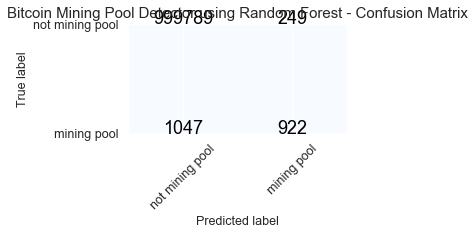

In [35]:
# Confusion matrix code adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    dummy = np.array([[0, 0], [0, 0]])
    plt.figure(figsize = (6, 6))
    plt.imshow(dummy, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['not mining pool', 'mining pool']
np.set_printoptions(precision = 2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, normalize = False, title = 'Bitcoin Mining Pool Detector using Random Forest - Confusion Matrix')

plt.show()

In [36]:
# Calculating Accuracy
acc = (cnf_matrix[0][0] + cnf_matrix[1][1]) / (cnf_matrix[0][0] + cnf_matrix[1][1] + cnf_matrix[0][1] + cnf_matrix[1][0])

In [37]:
print("Test Accuracy (Random Forest Classification): {}%" .format(acc * 100))

Test Accuracy (Random Forest Classification): 99.87065958621048%


In [38]:
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'
         }
pylab.rcParams.update(params)

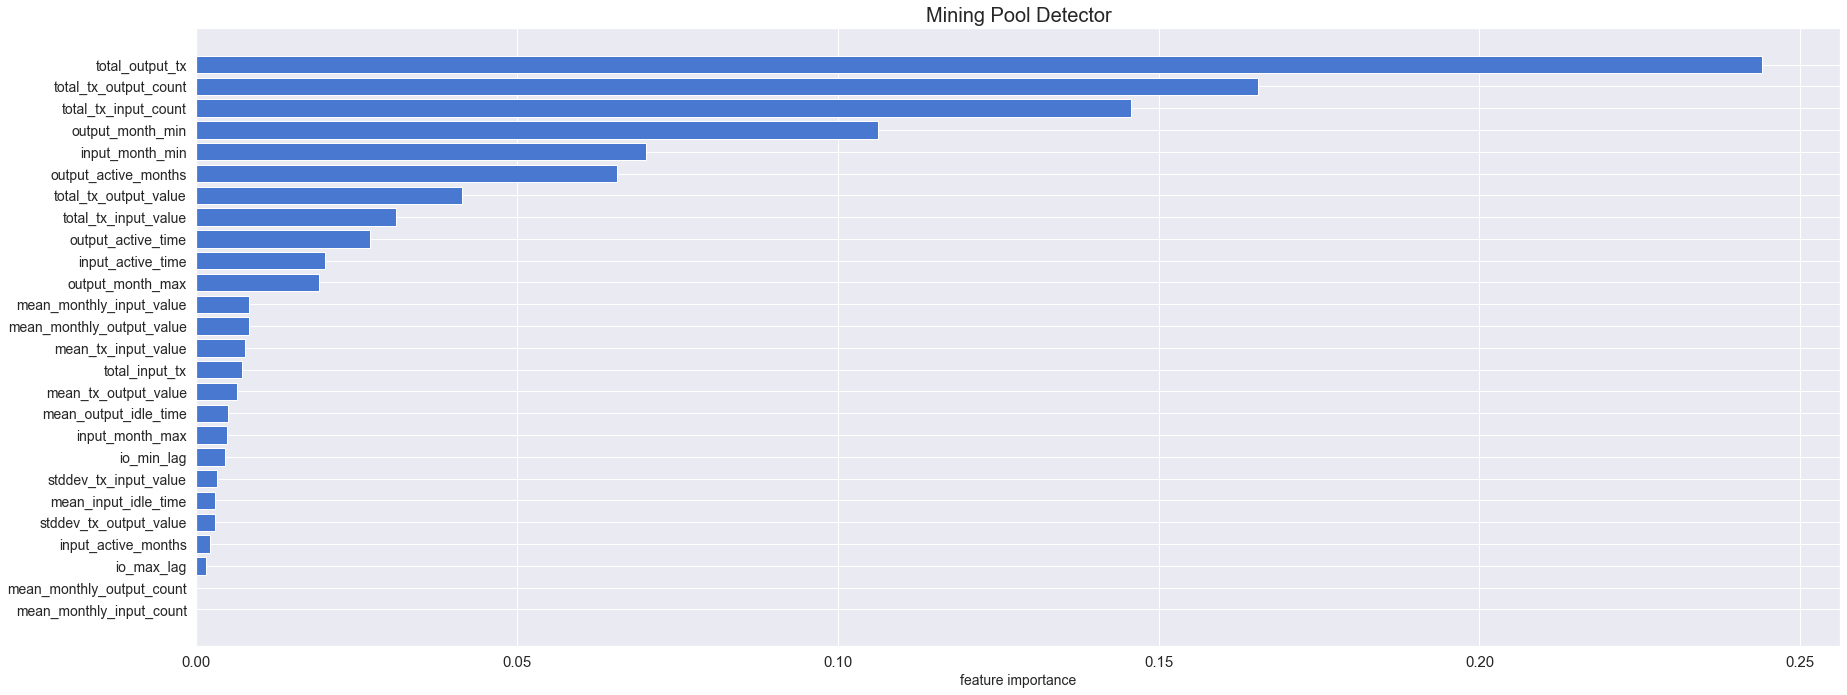

In [39]:
x_pos = np.arange(len(features.columns))
btc_importances = rf.feature_importances_

inds = np.argsort(btc_importances)[::-1]
btc_importances = btc_importances[inds]
cols = features.columns[inds]
bar_width = .8

# How many features to plot?
n_features = 26
x_pos = x_pos[:n_features][::-1]
btc_importances = btc_importances[:n_features]

# Plot
plt.figure(figsize = (26, 10))
plt.barh(x_pos, btc_importances, bar_width, label = 'BTC model')
plt.yticks(x_pos, cols, rotation = 0, fontsize = 14)
plt.xlabel('feature importance', fontsize = 14)
plt.title('Mining Pool Detector', fontsize = 20)
plt.tight_layout()

In [40]:
# Data points where model predicts true, but are labelled as false
false_positives = (y_test == False) & (y_pred == True)

In [42]:
# Subset to test set data only
df_test = p_df.iloc[indices_test, :]

print('False Positive addresses')

# Subset test set to false positives only
df_test.iloc[false_positives].head(15)

False Positive addresses


,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,...,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,mean_input_idle_time
4542402,False,1ENEYnM9mf3YB7kXMcEkYbjEeHRs6nzWuX,1385856000,1396310400,1385856000,1404172800,10454400,18316800,-7862400,0,...,5,85,739748427.000000000,8702922.670588235,6.129006e+06,15,8702922.670588235,1.0,1.275420e+05,1.338927e+06
532288,False,16R6JDWASbtMrcnqFpyeaRod3ph3A2GMRs,1314835200,1328054400,1325376000,1328054400,13219200,2678400,0,-10540800,...,2,29,1620000000.000000000,55862068.965517241,2.587294e+07,11,55862068.965517241,1.0,4.703988e+05,3.230762e+05
4010911,False,1C7efcRZo3ntytpnQweS2E8nVpuuyvyA8B,1306886400,1346457600,1309478400,1367366400,39571200,57888000,-20908800,-2592000,...,3,42,3012121029.000000000,71717167.357142857,4.620300e+07,4,71717167.357142857,1.0,1.009000e+06,1.962255e+07
4525280,False,15N1cXhhwmCRCtEVFMgk2RQa8Dks2JCnF9,1364774400,1454284800,1364774400,1454284800,89510400,89510400,0,0,...,17,166,3599174944.000000000,21681776.771084337,3.874046e+07,54,21681776.771084337,1.0,6.606727e+05,1.694364e+06
1519475,False,1PJcCEB8doeFVpmv3u5xvpbMe76FDW77Rp,1312156800,1328054400,1362096000,1420070400,15897600,57974400,-92016000,-49939200,...,5,49,3618000000.000000000,73836734.693877551,3.035097e+07,9,73836734.693877551,1.0,3.474611e+05,7.159420e+06
51557,False,1G7nRXfaFtiv7FRraLQkgYeMFDZPXwxkRv,1385856000,1438387200,1388534400,1506816000,52531200,118281600,-68428800,-2678400,...,4,46,480000000.000000000,10434782.608695652,2.948839e+06,10,10434782.608695652,1.0,1.194920e+06,1.996508e+07
3025219,False,1N8qwXTZbBYA5WryjkfAryC1AQKs7hNRo8,1388534400,1451606400,1388534400,1459468800,63072000,70934400,-7862400,0,...,6,300,2257029684.000000000,7523432.280000000,6.809081e+06,8,7523432.280000000,1.0,2.047715e+05,9.978674e+06
3540161,False,1QHHAQ8Fp66wbYvXBBpESRRiJSF9yoyPda,1385856000,1420070400,1388534400,1456790400,34214400,68256000,-36720000,-2678400,...,2,160,1770210854.000000000,11063817.837500000,3.080480e+07,4,11063817.837500000,1.0,2.180674e+05,2.237619e+07
1045345,False,1zZFrF47EDywkjoxD2wZhPd9dARXzMbQg,1306886400,1396310400,1314835200,1401580800,89424000,86745600,-5270400,-7948800,...,17,164,8283711691.000000000,50510437.140243902,9.417473e+07,23,50510437.140243902,1.0,5.552907e+05,3.895533e+06
3546483,False,18WWoLH8KvVXmVeYSS755q9pP3p3ewq2PW,1388534400,1412121600,1391212800,1404172800,23587200,12960000,7948800,-2678400,...,5,172,956380000.000000000,5560348.837209302,3.571106e+06,11,5560348.837209302,1.0,1.257817e+05,1.326852e+06


In [43]:
index = inds[: -1]
index

array([13,  9, 17,  0,  2,  8, 10, 18,  4,  5,  1, 22, 14, 19, 21, 11, 24,
        3,  7, 20, 25, 12, 16,  6, 15], dtype=int64)

In [44]:
data_top = x_train.columns

In [45]:
xann = pd.DataFrame(data = x_train_ann[0:, 0:], index = [i for i in range(x_train_ann.shape[0])], columns = [str(i) for i in data_top])
xtann = pd.DataFrame(data = x_test_ann[0:, 0:], index = [i for i in range(x_test_ann.shape[0])], columns = [str(i) for i in data_top])
xrf = x_train
xtrf = x_test
i = 1

In [ ]:
# Create plots with pre-defined labels
f = plt.figure(figsize = (10, 10))
ax = f.add_subplot(121)
t = list(np.arange(1., 27., 1))
t.reverse()
ax.plot(t, rf_acc, 'r-', label = 'Random Forest')
ax.plot(t, ann_acc, 'b--', label = 'Artificial Neural Network')

legend = ax.legend(loc = 'lower right', shadow = True, fontsize = 'x-small')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C6')
plt.ylabel('Test Accuracy (%)')
plt.xlabel('Number of features')
plt.title('RF vs ANN (Accuracy Comparison)')
plt.show()